In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

In [2]:
# Study data files
estimated_crimes_path = "estimated_crimes.csv"

# Read the  data and the study results
estimated_crimes = pd.read_csv(estimated_crimes_path)

estimated_crimes

,year,state_abbr,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,1995,NaN,262803276,1798792,21606,97470,NaN,580509,1099207,12063935,2593784,7997710,1472441,NaN
1,1996,NaN,265228572,1688540,19645,96252,NaN,535594,1037049,11805323,2506400,7904685,1394238,NaN
2,1997,NaN,267783607,1636099,18211,96153,NaN,498534,1023201,11558975,2461026,7743760,1354189,NaN
3,1998,NaN,270248003,1533887,16974,93144,NaN,447186,976583,10951827,2332735,7376311,1242781,NaN
4,1999,NaN,272690813,1426044,15522,89411,NaN,409371,911740,10208334,2100739,6955520,1152075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2012,WY,576626,1161,14,154,NaN,61,932,13222,2125,10513,584,NaN
1140,2013,WY,583223,1212,17,144,NaN,74,917,12809,1956,10275,578,NaN
1141,2014,WY,584304,1142,16,127,204.0,53,899,11477,1689,9185,603,NaN
1142,2015,WY,586555,1300,16,171,124.0,59,1054,11151,1762,8797,592,NaN


In [3]:
estimated_crimes_2006 = estimated_crimes[estimated_crimes['year'] >= int('2006')]
estimated_crimes_2006_09 = estimated_crimes_2006[estimated_crimes_2006['year'] <= int('2009')]
estimated_crimes_2006_09

,year,state_abbr,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
11,2006,NaN,299398484,1435123,17309,94472,NaN,449246,874096,10019601,2194993,6626363,1198245,NaN
12,2007,NaN,301621157,1422970,17128,92160,NaN,447324,866358,9882212,2190198,6591542,1100472,NaN
13,2008,NaN,304059724,1394461,16465,90750,NaN,443563,843683,9774152,2228887,6586206,959059,NaN
14,2009,NaN,307006550,1325896,15399,89241,NaN,408742,812514,9337060,2203313,6338095,795652,NaN
33,2006,AL,4599030,19553,382,1646,NaN,7062,10463,181249,44780,121451,15018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2009,WI,5654774,14650,146,1118,NaN,4904,8482,147692,26813,111947,8932,NaN
1133,2006,WY,515004,1307,13,151,NaN,72,1071,15381,2322,12255,804,NaN
1134,2007,WY,522830,1344,21,172,NaN,84,1067,15053,2365,11875,813,NaN
1135,2008,WY,532668,1330,12,185,NaN,87,1046,14515,2198,11584,733,NaN


In [4]:
crime_rates_06_09 = estimated_crimes_2006_09.drop(columns = ['rape_revised', 'caveats'], axis = 1)
crime_rates_06_09 = crime_rates_06_09.dropna()

crime_rates_06_09

,year,state_abbr,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
33,2006,AL,4599030,19553,382,1646,7062,10463,181249,44780,121451,15018
34,2007,AL,4627851,20775,412,1548,7398,11417,184082,45379,124465,14238
35,2008,AL,4661900,21110,351,1618,7346,11795,190416,50411,126539,13466
36,2009,AL,4708708,21194,322,1504,6265,13103,178007,48844,118072,11091
55,2006,AK,670053,4610,36,512,600,3462,23975,4155,17284,2536
...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2009,WI,5654774,14650,146,1118,4904,8482,147692,26813,111947,8932
1133,2006,WY,515004,1307,13,151,72,1071,15381,2322,12255,804
1134,2007,WY,522830,1344,21,172,84,1067,15053,2365,11875,813
1135,2008,WY,532668,1330,12,185,87,1046,14515,2198,11584,733


In [5]:
crime_rates_06_09["total_crime"]=crime_rates_06_09["violent_crime"]+ crime_rates_06_09["homicide"]+crime_rates_06_09["rape_legacy"]+crime_rates_06_09["robbery"]+ crime_rates_06_09["aggravated_assault"]+crime_rates_06_09["property_crime"]+crime_rates_06_09["burglary"]+crime_rates_06_09["larceny"]+crime_rates_06_09["motor_vehicle_theft"]
crime_rates_06_09

,year,state_abbr,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total_crime
33,2006,AL,4599030,19553,382,1646,7062,10463,181249,44780,121451,15018,401604
34,2007,AL,4627851,20775,412,1548,7398,11417,184082,45379,124465,14238,409714
35,2008,AL,4661900,21110,351,1618,7346,11795,190416,50411,126539,13466,423052
36,2009,AL,4708708,21194,322,1504,6265,13103,178007,48844,118072,11091,398402
55,2006,AK,670053,4610,36,512,600,3462,23975,4155,17284,2536,57170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2009,WI,5654774,14650,146,1118,4904,8482,147692,26813,111947,8932,324684
1133,2006,WY,515004,1307,13,151,72,1071,15381,2322,12255,804,33376
1134,2007,WY,522830,1344,21,172,84,1067,15053,2365,11875,813,32794
1135,2008,WY,532668,1330,12,185,87,1046,14515,2198,11584,733,31690


In [6]:
crime_rates_06_09["crime_rate"]=crime_rates_06_09["total_crime"]/crime_rates_06_09["population"]*100
crime_rates_06_09

,year,state_abbr,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total_crime,crime_rate
33,2006,AL,4599030,19553,382,1646,7062,10463,181249,44780,121451,15018,401604,8.732363
34,2007,AL,4627851,20775,412,1548,7398,11417,184082,45379,124465,14238,409714,8.853224
35,2008,AL,4661900,21110,351,1618,7346,11795,190416,50411,126539,13466,423052,9.074669
36,2009,AL,4708708,21194,322,1504,6265,13103,178007,48844,118072,11091,398402,8.460962
55,2006,AK,670053,4610,36,512,600,3462,23975,4155,17284,2536,57170,8.532161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2009,WI,5654774,14650,146,1118,4904,8482,147692,26813,111947,8932,324684,5.741768
1133,2006,WY,515004,1307,13,151,72,1071,15381,2322,12255,804,33376,6.480726
1134,2007,WY,522830,1344,21,172,84,1067,15053,2365,11875,813,32794,6.272402
1135,2008,WY,532668,1330,12,185,87,1046,14515,2198,11584,733,31690,5.949297


In [7]:

crime_rates_2006=crime_rates_06_09.loc[crime_rates_06_09["year"]==2006]
crime_rates_2006.reset_index(drop=True, inplace=True)
crime_rates_2006.head()

,year,state_abbr,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total_crime,crime_rate
0,2006,AL,4599030,19553,382,1646,7062,10463,181249,44780,121451,15018,401604,8.732363
1,2006,AK,670053,4610,36,512,600,3462,23975,4155,17284,2536,57170,8.532161
2,2006,AZ,6166318,33456,533,2449,9491,20983,294389,59418,178321,56650,655690,10.633412
3,2006,AR,2810872,15538,205,1325,2749,11259,112025,31864,72646,7515,255126,9.076400
4,2006,CA,36457549,194483,2486,9235,71142,111620,1159988,247230,669103,243655,2708942,7.430401


In [8]:

crime_rates_2007=crime_rates_06_09.loc[crime_rates_06_09["year"]==2007]
crime_rates_2007.reset_index(drop=True, inplace=True)

crime_rates_2007.head()

,year,state_abbr,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total_crime,crime_rate
0,2007,AL,4627851,20775,412,1548,7398,11417,184082,45379,124465,14238,409714,8.853224
1,2007,AK,683478,4520,43,545,581,3351,23096,3734,16929,2433,55232,8.081021
2,2007,AZ,6338755,32835,548,2353,9764,20170,287308,59988,177076,50244,640286,10.101132
3,2007,AR,2834797,15226,198,1294,3105,10629,112130,32035,73096,6999,254712,8.985194
4,2007,CA,36553215,191561,2262,9046,70706,109547,1112510,237850,654526,220134,2608142,7.135192


In [9]:
crime_rates_2008=crime_rates_06_09.loc[crime_rates_06_09["year"]==2008]
crime_rates_2008.reset_index(drop=True, inplace=True)

crime_rates_2008.head()

,year,state_abbr,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total_crime,crime_rate
0,2008,AL,4661900,21110,351,1618,7346,11795,190416,50411,126539,13466,423052,9.074669
1,2008,AK,686293,4475,27,447,645,3356,20090,3237,15225,1628,49130,7.158750
2,2008,AZ,6500180,31567,462,2200,9809,19096,266653,58606,169460,38587,596440,9.175746
3,2008,AR,2855390,14649,165,1463,2777,10244,110360,33912,69905,6543,250018,8.756002
4,2008,CA,36756666,185329,2142,8903,69388,104896,1080996,237811,650656,192529,2532650,6.890315


In [10]:
crime_rates_2009=crime_rates_06_09.loc[crime_rates_06_09["year"]==2009]
crime_rates_2009.reset_index(drop=True, inplace=True)

crime_rates_2009.head()

,year,state_abbr,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total_crime,crime_rate
0,2009,AL,4708708,21194,322,1504,6265,13103,178007,48844,118072,11091,398402,8.460962
1,2009,AK,698473,4424,22,513,654,3235,20538,3600,15251,1687,49924,7.147592
2,2009,AZ,6595778,28128,380,2279,8199,17270,236721,54308,155976,26437,529698,8.030865
3,2009,AR,2889450,14905,179,1378,2576,10772,109078,34753,68228,6097,247966,8.581772
4,2009,CA,36961664,174934,1972,8713,64093,100156,1009433,230198,615402,163833,2368734,6.408624


In [11]:
crimerates_allyears=pd.DataFrame({"state": crime_rates_2006["state_abbr"], 
                                 "crimerate_2006": crime_rates_2006["crime_rate"],
                                 "crimerate_2007": crime_rates_2007["crime_rate"],
                                 "crimerate_2008": crime_rates_2008["crime_rate"],
                                 "crimerate_2009": crime_rates_2009["crime_rate"]})
crimerates_allyears


,state,crimerate_2006,crimerate_2007,crimerate_2008,crimerate_2009
0,AL,8.732363,8.853224,9.074669,8.460962
1,AK,8.532161,8.081021,7.158750,7.147592
2,AZ,10.633412,10.101132,9.175746,8.030865
3,AR,9.076400,8.985194,8.756002,8.581772
4,CA,7.430401,7.135192,6.890315,6.408624
5,CO,7.667517,6.701985,6.349687,6.018929
6,CT,5.771670,5.543486,5.594970,5.298770
7,DE,8.354775,8.167778,8.606653,7.998445
8,DC,12.324730,12.662759,13.084772,12.201642
9,FL,9.405288,9.622654,9.658758,8.906596


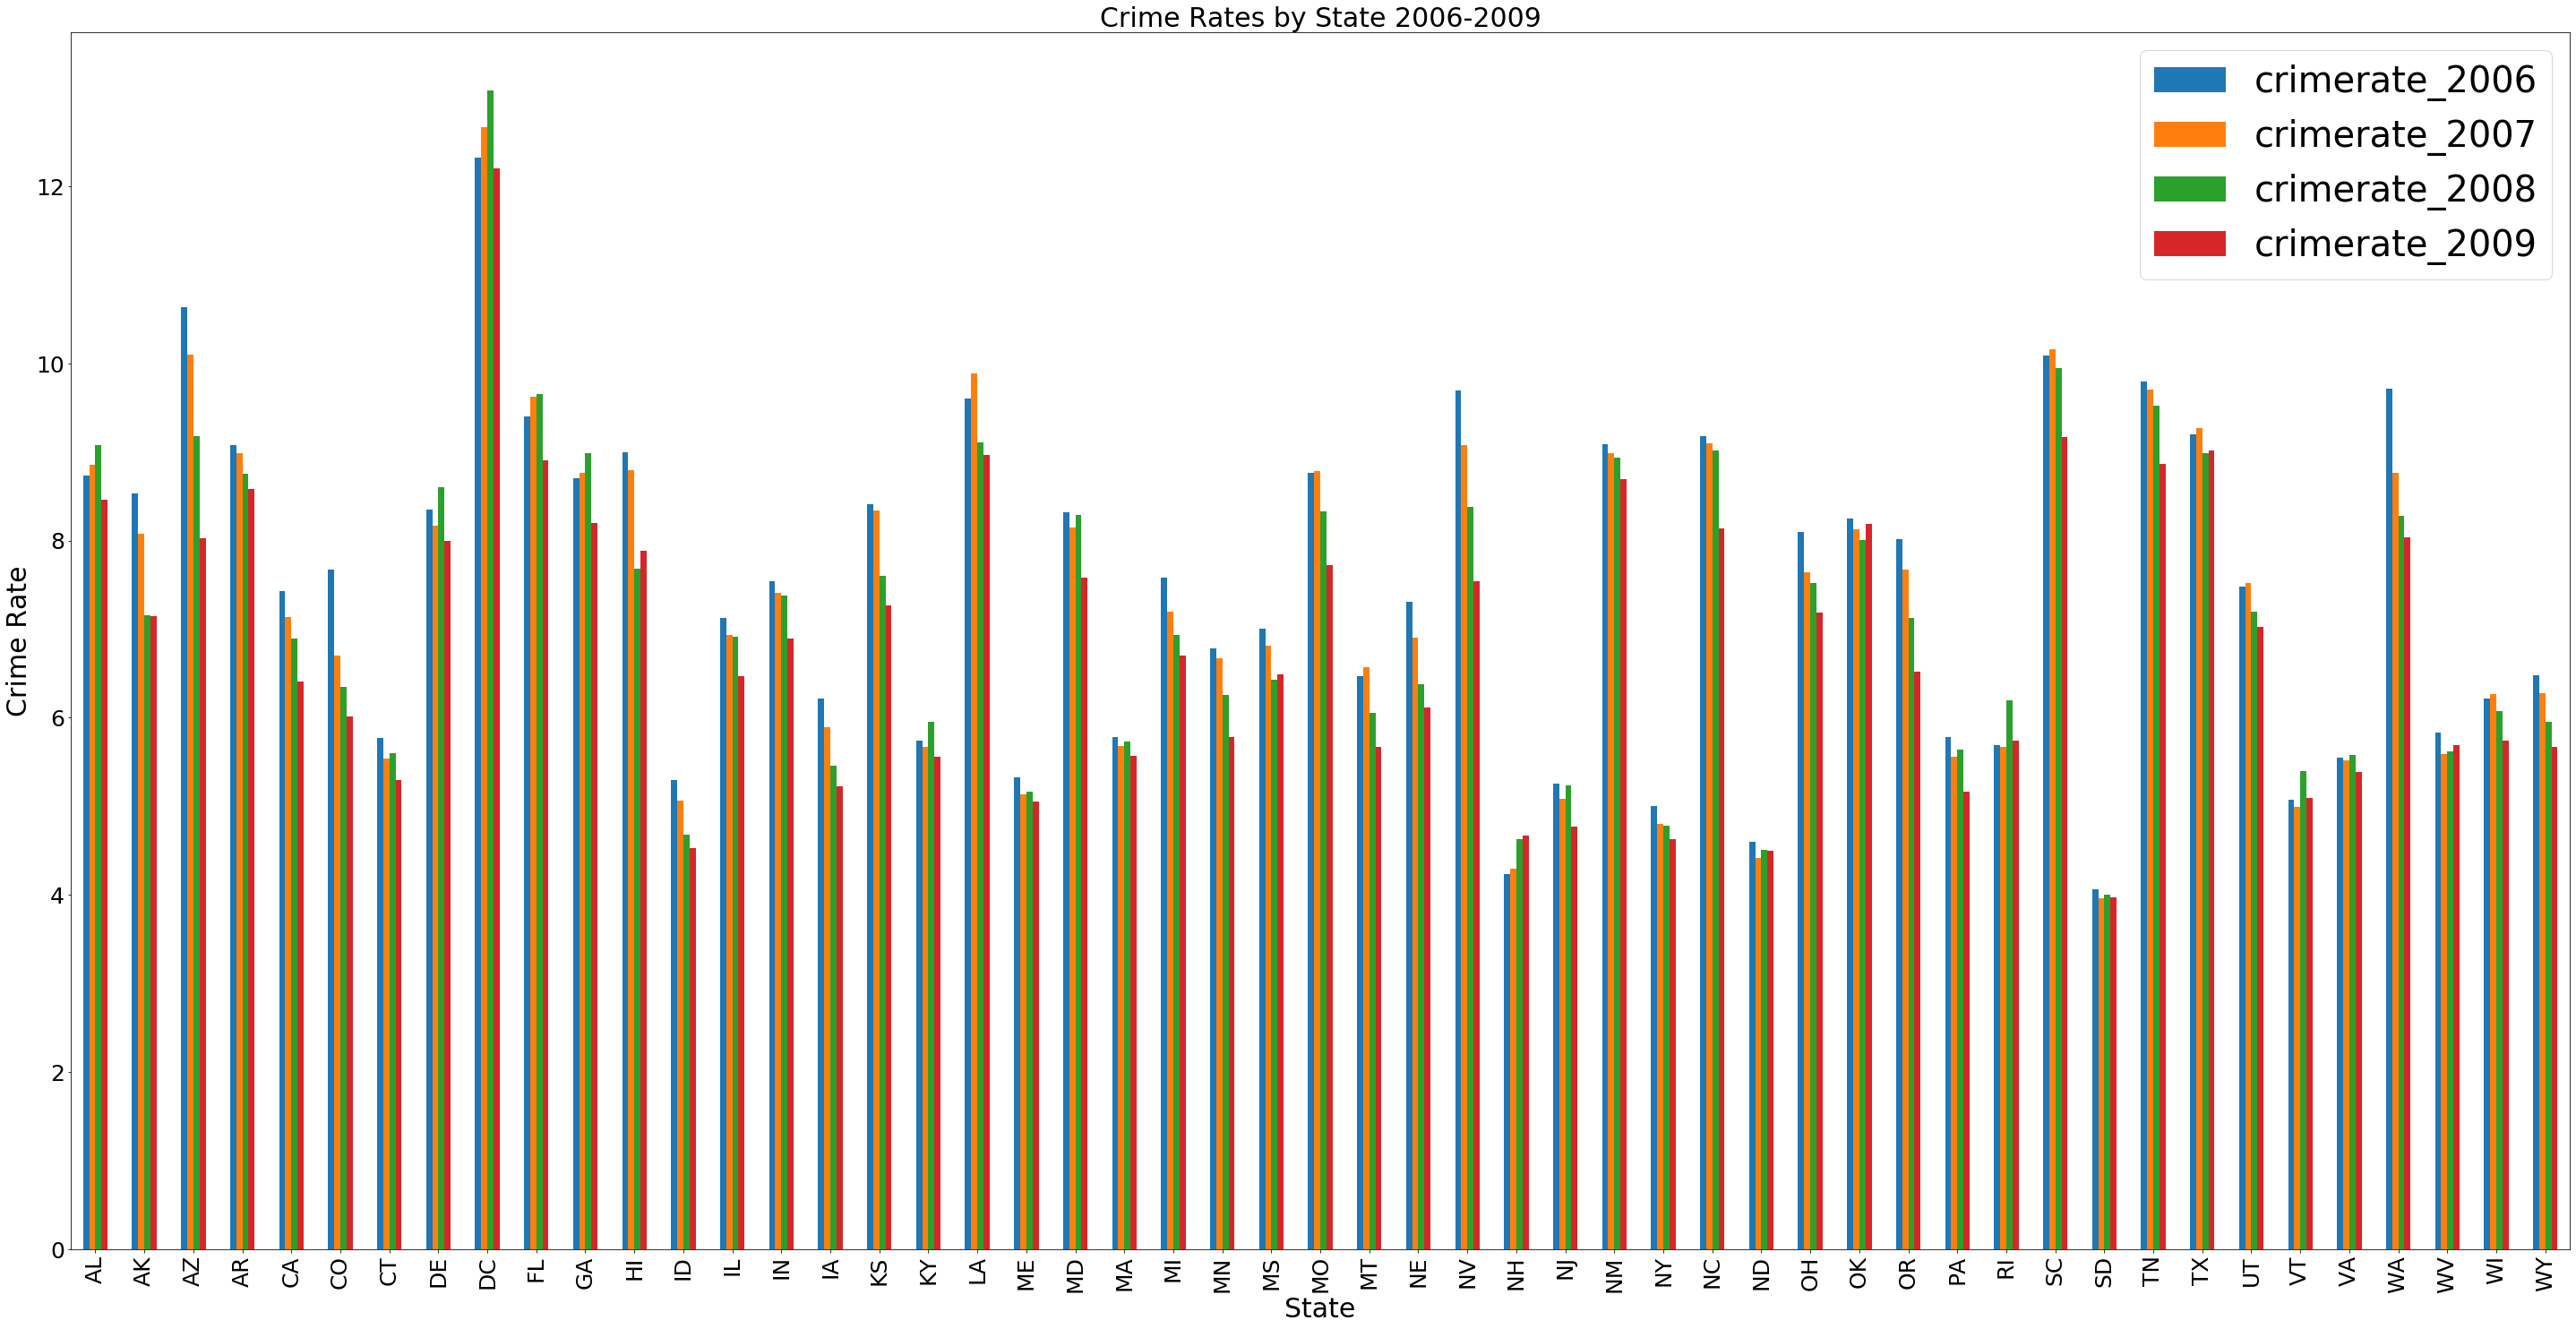

In [12]:
multi_plot = crimerates_allyears.plot(kind="bar", figsize = (50, 25))
multi_plot.set_xticklabels(crimerates_allyears['state'], rotation = 90)

multi_plot.legend(fancybox=True, frameon=True, prop={'size':40})
plt.title('Crime Rates by State 2006-2009', fontsize=30)
#plt.legend("crimerate_2006")
plt.xlabel('State', fontsize=30)
plt.ylabel('Crime Rate', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(labelsize=25)

plt.show()

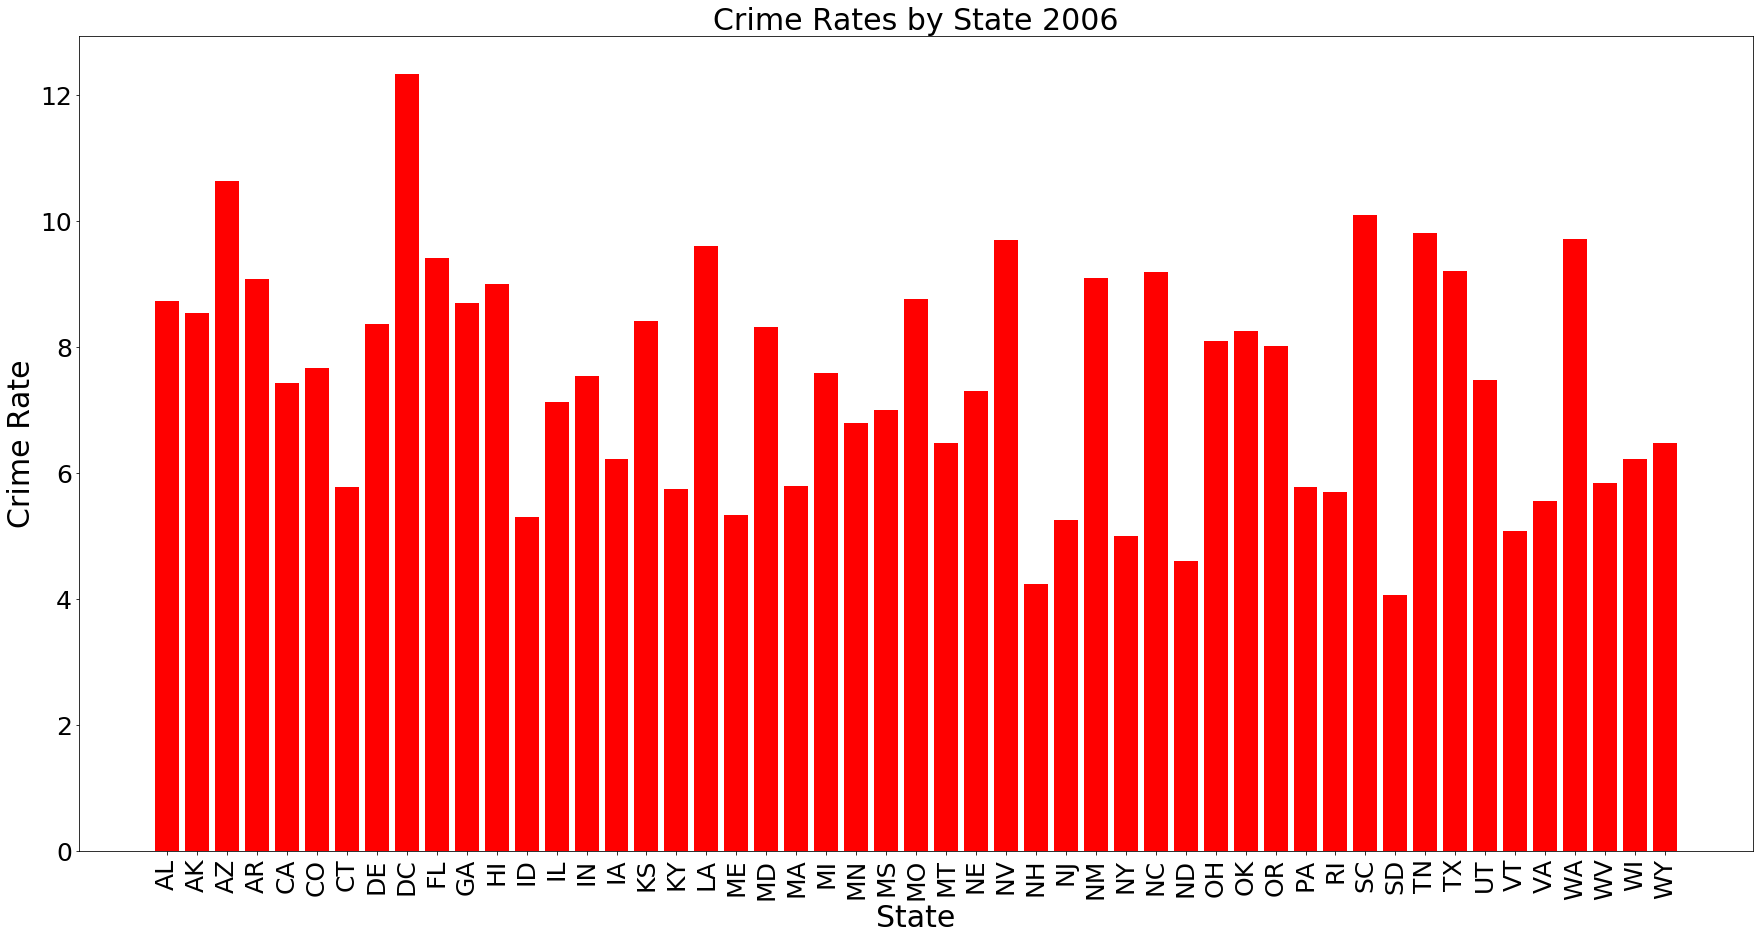

In [13]:
plt.figure(figsize=(30,15))
plt.bar(crimerates_allyears["state"], crimerates_allyears["crimerate_2006"], color="red")
plt.title('Crime Rates by State 2006', fontsize=30)
#plt.legend()
plt.xlabel('State', fontsize=30)
plt.ylabel('Crime Rate', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(labelsize=25)

#plt.tick_params(axis='x', which='major',labelsize=2)
plt.savefig('CrimeRatebyState2006')
plt.show()

In [14]:

# Study data files
grad_rates_path = "GradRates.csv"

# Read the  data and the study results
grad_rates = pd.read_csv(grad_rates_path)

grad_rates

,Unnamed: 0,Year,State,LEAID,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGEB,AFGR,TOTOHC
0,0,2006-07,1,100002,0,0,-2.0,-1,-1,-1.0,-1
1,1,2006-07,1,100005,30,749,4.0,192,263,73.0,14
2,2,2006-07,1,100006,46,1209,3.8,216,456,47.4,28
3,3,2006-07,1,100007,45,2726,1.7,779,878,88.7,10
4,4,2006-07,1,100008,8,1968,0.4,562,576,97.6,10
...,...,...,...,...,...,...,...,...,...,...,...
73124,73124,2009-10,66,6600040,-1,-1,-1.0,-1,-1,-1.0,-1
73125,73125,2009-10,69,6900030,-1,-1,-1.0,-1,-1,-1.0,-1
73126,73126,2009-10,72,7200030,-9,145172,-9.0,25514,41984,60.8,-2
73127,73127,2009-10,78,7800002,144,2591,5.6,463,-2,-2.0,0


In [15]:
grad_rates = grad_rates.drop(columns = ['LEAID', 'AFGEB','TOTOHC'], axis = 1)
grad_rates = grad_rates.drop(columns = ['Unnamed: 0'], axis = 1)
grad_rates

,Year,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR
0,2006-07,1,0,0,-2.0,-1,-1.0
1,2006-07,1,30,749,4.0,192,73.0
2,2006-07,1,46,1209,3.8,216,47.4
3,2006-07,1,45,2726,1.7,779,88.7
4,2006-07,1,8,1968,0.4,562,97.6
...,...,...,...,...,...,...,...
73124,2009-10,66,-1,-1,-1.0,-1,-1.0
73125,2009-10,69,-1,-1,-1.0,-1,-1.0
73126,2009-10,72,-9,145172,-9.0,25514,60.8
73127,2009-10,78,144,2591,5.6,463,-2.0


In [16]:
state_abbr = {
    1: 'AL',
    2: 'AK',
    60: 'AS',
    4: 'AZ',
    5: 'AR',
    6: 'CA',
    8: 'CO',
    9: 'CT',
    10: 'DE',
    11: 'DC',
    12: 'FL',
    13: 'GA',
    66: 'GU',
    15: 'HI',
    16: 'ID',
    17: 'IL',
    18: 'IN',
    19: 'IA',
    20: 'KS',
    21: 'KY',
    22: 'LA',
    23: 'ME',
    24: 'MD',
    25: 'MA',
    26: 'MI',
    27: 'MN',
    28: 'MS',
    29: 'MO',
    30: 'MT',
    31: 'NE',
    32: 'NV',
    33: 'NH',
    34: 'NJ',
    35: 'NM',
    36: 'NY',
    37: 'NC',
    38: 'ND',
    69:'MP',
    39: 'OH',
    40: 'OK',
    41: 'OR',
    42: 'PA',
    72: 'PR',
    44: 'RI',
    45: 'SC',
    46: 'SD',
    47: 'TN',
    48: 'TX',
    49: 'UT',
    50: 'VT',
    78: 'VI',
    51: 'VA',
    53: 'WA',
    54: 'WV',
    55: 'WI',
    56: 'WY'
}
pprint(state_abbr)

{1: 'AL',
 2: 'AK',
 4: 'AZ',
 5: 'AR',
 6: 'CA',
 8: 'CO',
 9: 'CT',
 10: 'DE',
 11: 'DC',
 12: 'FL',
 13: 'GA',
 15: 'HI',
 16: 'ID',
 17: 'IL',
 18: 'IN',
 19: 'IA',
 20: 'KS',
 21: 'KY',
 22: 'LA',
 23: 'ME',
 24: 'MD',
 25: 'MA',
 26: 'MI',
 27: 'MN',
 28: 'MS',
 29: 'MO',
 30: 'MT',
 31: 'NE',
 32: 'NV',
 33: 'NH',
 34: 'NJ',
 35: 'NM',
 36: 'NY',
 37: 'NC',
 38: 'ND',
 39: 'OH',
 40: 'OK',
 41: 'OR',
 42: 'PA',
 44: 'RI',
 45: 'SC',
 46: 'SD',
 47: 'TN',
 48: 'TX',
 49: 'UT',
 50: 'VT',
 51: 'VA',
 53: 'WA',
 54: 'WV',
 55: 'WI',
 56: 'WY',
 60: 'AS',
 66: 'GU',
 69: 'MP',
 72: 'PR',
 78: 'VI'}


In [17]:
grad_rates['state_abbr'] = grad_rates['State'].map(state_abbr)
grad_rates

,Year,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR,state_abbr
0,2006-07,1,0,0,-2.0,-1,-1.0,AL
1,2006-07,1,30,749,4.0,192,73.0,AL
2,2006-07,1,46,1209,3.8,216,47.4,AL
3,2006-07,1,45,2726,1.7,779,88.7,AL
4,2006-07,1,8,1968,0.4,562,97.6,AL
...,...,...,...,...,...,...,...,...
73124,2009-10,66,-1,-1,-1.0,-1,-1.0,GU
73125,2009-10,69,-1,-1,-1.0,-1,-1.0,MP
73126,2009-10,72,-9,145172,-9.0,25514,60.8,PR
73127,2009-10,78,144,2591,5.6,463,-2.0,VI


In [18]:
grad_rates = grad_rates[grad_rates['Total Dropouts'] >= 0]
grad_rates = grad_rates[grad_rates['Dropout Enroll base'] >= 0]
grad_rates = grad_rates[grad_rates['Droupout Rate'] >= 0]
grad_rates = grad_rates[grad_rates['Diploma Count'] >= 0]
grad_rates = grad_rates[grad_rates['AFGR'] >= 0]

grad_rates

,Year,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR,state_abbr
1,2006-07,1,30,749,4.0,192,73.0,AL
2,2006-07,1,46,1209,3.8,216,47.4,AL
3,2006-07,1,45,2726,1.7,779,88.7,AL
4,2006-07,1,8,1968,0.4,562,97.6,AL
7,2006-07,1,19,317,6.0,70,61.9,AL
...,...,...,...,...,...,...,...,...
72899,2009-10,56,13,284,4.6,71,88.8,WY
72900,2009-10,56,57,969,5.9,217,81.9,WY
72901,2009-10,56,5,100,5.0,19,82.6,WY
72906,2009-10,56,19,399,4.8,93,84.5,WY


In [19]:
grad_rates_2006=grad_rates.loc[grad_rates["Year"]=="2006-07"]
grad_rates_2006.reset_index(drop=True, inplace=True)
grad_rates_2006

,Year,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR,state_abbr
0,2006-07,1,30,749,4.0,192,73.0,AL
1,2006-07,1,46,1209,3.8,216,47.4,AL
2,2006-07,1,45,2726,1.7,779,88.7,AL
3,2006-07,1,8,1968,0.4,562,97.6,AL
4,2006-07,1,19,317,6.0,70,61.9,AL
...,...,...,...,...,...,...,...,...
8197,2006-07,56,0,66,0.0,18,78.3,WY
8198,2006-07,56,23,359,6.4,100,84.0,WY
8199,2006-07,56,0,23,0.0,3,50.0,WY
8200,2006-07,69,99,2574,3.8,643,73.6,MP


In [20]:
grad_rates_2006_bystate = grad_rates_2006.groupby(['state_abbr']).mean()
grad_rates_2006_bystate.reset_index(inplace=True)
grad_rates_2006_bystate

,state_abbr,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR
0,AK,2.0,87.314286,902.142857,11.277143,208.714286,67.094286
1,AL,1.0,41.720339,1343.262712,3.564407,311.864407,67.037288
2,AR,5.0,29.909091,482.478469,5.689474,122.047847,81.101914
3,AZ,4.0,81.805755,1012.410072,17.746043,243.820144,71.335252
4,CA,6.0,250.907162,3302.689655,10.130769,734.944297,70.654377
5,CO,8.0,126.559055,1400.496063,7.071654,348.637795,78.949606
6,CT,9.0,33.431579,1080.778947,2.934737,299.031579,81.471579
7,DC,11.0,1256.000000,12145.000000,10.300000,2489.000000,57.300000
8,DE,10.0,95.142857,1305.571429,7.438095,319.761905,67.271429
9,FL,12.0,461.272727,9314.060606,5.019697,2142.863636,64.822727


In [21]:
grad_rates_2007=grad_rates.loc[grad_rates["Year"]=="2007-08"]
grad_rates_2007.reset_index(drop=True, inplace=True)
grad_rates_2007.head()

,Year,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR,state_abbr
0,2007-08,1,29,939,3.1,172,69.6,AL
1,2007-08,1,41,1612,2.5,276,61.3,AL
2,2007-08,1,38,3817,1.0,899,91.9,AL
3,2007-08,1,27,2715,1.0,624,100.0,AL
4,2007-08,1,15,401,3.7,72,67.3,AL


In [22]:
grad_rates_2007_bystate = grad_rates_2007.groupby(['state_abbr']).mean()
grad_rates_2007_bystate.reset_index(inplace=True)

grad_rates_2007_bystate.head()

,state_abbr,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR
0,AK,2.0,85.942857,1149.542857,10.197143,212.942857,64.702857
1,AL,1.0,40.803571,1810.312500,2.580357,343.446429,69.401786
2,AR,5.0,30.136792,624.320755,4.485377,128.641509,79.701887
3,AZ,4.0,75.454545,1370.335664,11.965035,263.650350,70.092308
4,CA,6.0,219.329923,4137.488491,7.846036,780.309463,74.368031


In [23]:

grad_rates_2008=grad_rates.loc[grad_rates["Year"]=="2008-09"]
grad_rates_2008.reset_index(drop=True, inplace=True)
grad_rates_2008.head()

,Year,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR,state_abbr
0,2008-09,1,21,976,2.1,171,64.0,AL
1,2008-09,1,21,1671,1.3,325,67.0,AL
2,2008-09,1,30,3823,0.8,775,89.6,AL
3,2008-09,1,19,2820,0.7,663,100.0,AL
4,2008-09,1,12,397,3.0,87,77.7,AL


In [24]:

grad_rates_2008_bystate = grad_rates_2008.groupby(['state_abbr']).mean()
grad_rates_2008_bystate.reset_index(inplace=True)

grad_rates_2008_bystate.head()

,state_abbr,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR
0,AK,2.0,72.050000,1006.875000,8.642500,194.525000,65.995000
1,AL,1.0,30.277778,1859.611111,1.751852,357.703704,70.660185
2,AR,5.0,25.465438,599.258065,4.000461,122.239631,76.007373
3,AZ,4.0,74.391892,1323.094595,10.991216,264.844595,74.558784
4,CO,8.0,103.736842,1735.684211,4.132331,346.639098,78.447368


In [25]:

grad_rates_2009=grad_rates.loc[grad_rates["Year"]=="2009-10"]
grad_rates_2009.reset_index(drop=True, inplace=True)
grad_rates_2009.head()

,Year,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR,state_abbr
0,2009-10,1,18,327,5.5,49,48.5,AL
1,2009-10,1,54,1184,4.6,164,51.4,AL
2,2009-10,1,39,855,4.6,162,66.1,AL
3,2009-10,1,58,909,6.4,177,70.8,AL
4,2009-10,1,43,568,7.6,117,65.0,AL


In [26]:

grad_rates_2009_bystate = grad_rates_2009.groupby(['state_abbr']).mean()
grad_rates_2009_bystate.reset_index(inplace=True)

grad_rates_2009_bystate.head()

,state_abbr,State,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR
0,AK,2.0,86.312500,1191.031250,10.306250,237.968750,68.959375
1,AL,1.0,39.000000,699.166667,5.833333,122.666667,60.366667
2,AR,5.0,34.472222,578.902778,5.859722,117.111111,73.431944
3,AZ,4.0,105.392523,869.392523,17.188785,135.084112,74.459813
4,CA,6.0,374.586420,4444.617284,15.664198,827.802469,71.730247


In [27]:
gradrates_allyears=pd.DataFrame({"state": grad_rates_2006_bystate["state_abbr"], 
                                 "gradrate_2006": grad_rates_2006_bystate["AFGR"],
                                 "gradrate_2007": grad_rates_2007_bystate["AFGR"],
                                 "gradrate_2008": grad_rates_2008_bystate["AFGR"],
                                 "gradrate_2009": grad_rates_2009_bystate["AFGR"]})
gradrates_allyears

,state,gradrate_2006,gradrate_2007,gradrate_2008,gradrate_2009
0,AK,67.094286,64.702857,65.995000,68.959375
1,AL,67.037288,69.401786,70.660185,60.366667
2,AR,81.101914,79.701887,76.007373,73.431944
3,AZ,71.335252,70.092308,74.558784,74.459813
4,CA,70.654377,74.368031,78.447368,71.730247
5,CO,78.949606,78.541085,80.090526,70.718605
6,CT,81.471579,82.775248,62.050000,66.658333
7,DC,57.300000,59.175000,72.319048,60.481818
8,DE,67.271429,69.866667,68.650725,64.059322
9,FL,64.822727,66.247761,66.400000,75.400000


In [68]:
#Selecting Crime rate Data for NY
crimerates_allyears.iloc[32]

state                  NY
crimerate_2006    4.99936
crimerate_2007    4.80457
crimerate_2008    4.78335
crimerate_2009    4.63269
Name: 32, dtype: object

In [67]:
#Selecting Grad Rates for NY
gradrates_allyears.iloc[34]

state                 NY
gradrate_2006    81.1606
gradrate_2007    81.5782
gradrate_2008    79.3413
gradrate_2009     72.725
Name: 34, dtype: object

In [71]:
#Create Data Frame for NY Grad Rates and Crime Rate
NY_grads_crime = {'Years': ['2006','2007', '2008', '2009'],
            'Grad Rate': [81.1606,81.5782,79.3413,72.725],
            'Crime Rate': [4.99936,4.80457,4.78335,4.63269]
        }

NY_grads_crime_df = pd.DataFrame(NY_grads_crime, columns = ['Years','Grad Rate','Crime Rate'])

NY_grads_crime_df

,Years,Grad Rate,Crime Rate
0,2006,81.1606,4.99936
1,2007,81.5782,4.80457
2,2008,79.3413,4.78335
3,2009,72.7250,4.63269


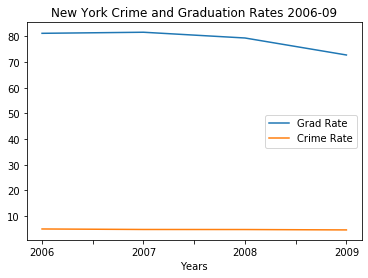

In [88]:
#Graphing NY Crime Rates and Grad Rates
NY_grads_crime_df.plot(x ='Years', y=['Grad Rate','Crime Rate'], kind = 'line')

#NY_grads_crime_df.plot(x ='Grad Rate', y='Crime Rate', kind = 'bar')
plt.title('New York Crime and Graduation Rates 2006-09')
plt.show()

In [82]:
#Selecting Crime rate Data for NJ
crimerates_allyears.iloc[30]

state                  NJ
crimerate_2006    5.25803
crimerate_2007    5.08598
crimerate_2008    5.23982
crimerate_2009    4.77426
Name: 30, dtype: object

In [83]:
#Selecting Grad Rates for NJ
gradrates_allyears.iloc[32]

state                 NJ
gradrate_2006     85.235
gradrate_2007    81.8562
gradrate_2008    83.3121
gradrate_2009    77.6725
Name: 32, dtype: object

In [84]:
#Create Data Frame for NJ Grad Rates and Crime Rate
NJ_grads_crime = {'Years': ['2006','2007', '2008', '2009'],
            'Grad Rate': [85.235,81.8562,83.3121,77.6725],
            'Crime Rate': [5.25803,5.08598,5.23982,4.77426]
        }

NJ_grads_crime_df = pd.DataFrame(NJ_grads_crime, columns = ['Years','Grad Rate','Crime Rate'])

NJ_grads_crime_df

,Years,Grad Rate,Crime Rate
0,2006,85.2350,5.25803
1,2007,81.8562,5.08598
2,2008,83.3121,5.23982
3,2009,77.6725,4.77426


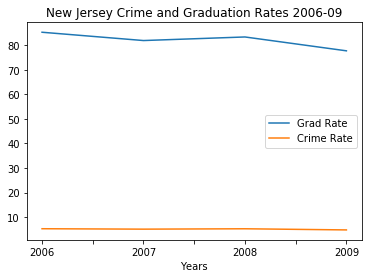

In [89]:
#Graphing NJ Crime Rates and Grad Rates
NJ_grads_crime_df.plot(x ='Years', y=['Grad Rate','Crime Rate'], kind = 'line')

#NJ_grads_crime_df.plot(x ='Grad Rate', y='Crime Rate', kind = 'bar')
plt.title('New Jersey Crime and Graduation Rates 2006-09')
plt.show()

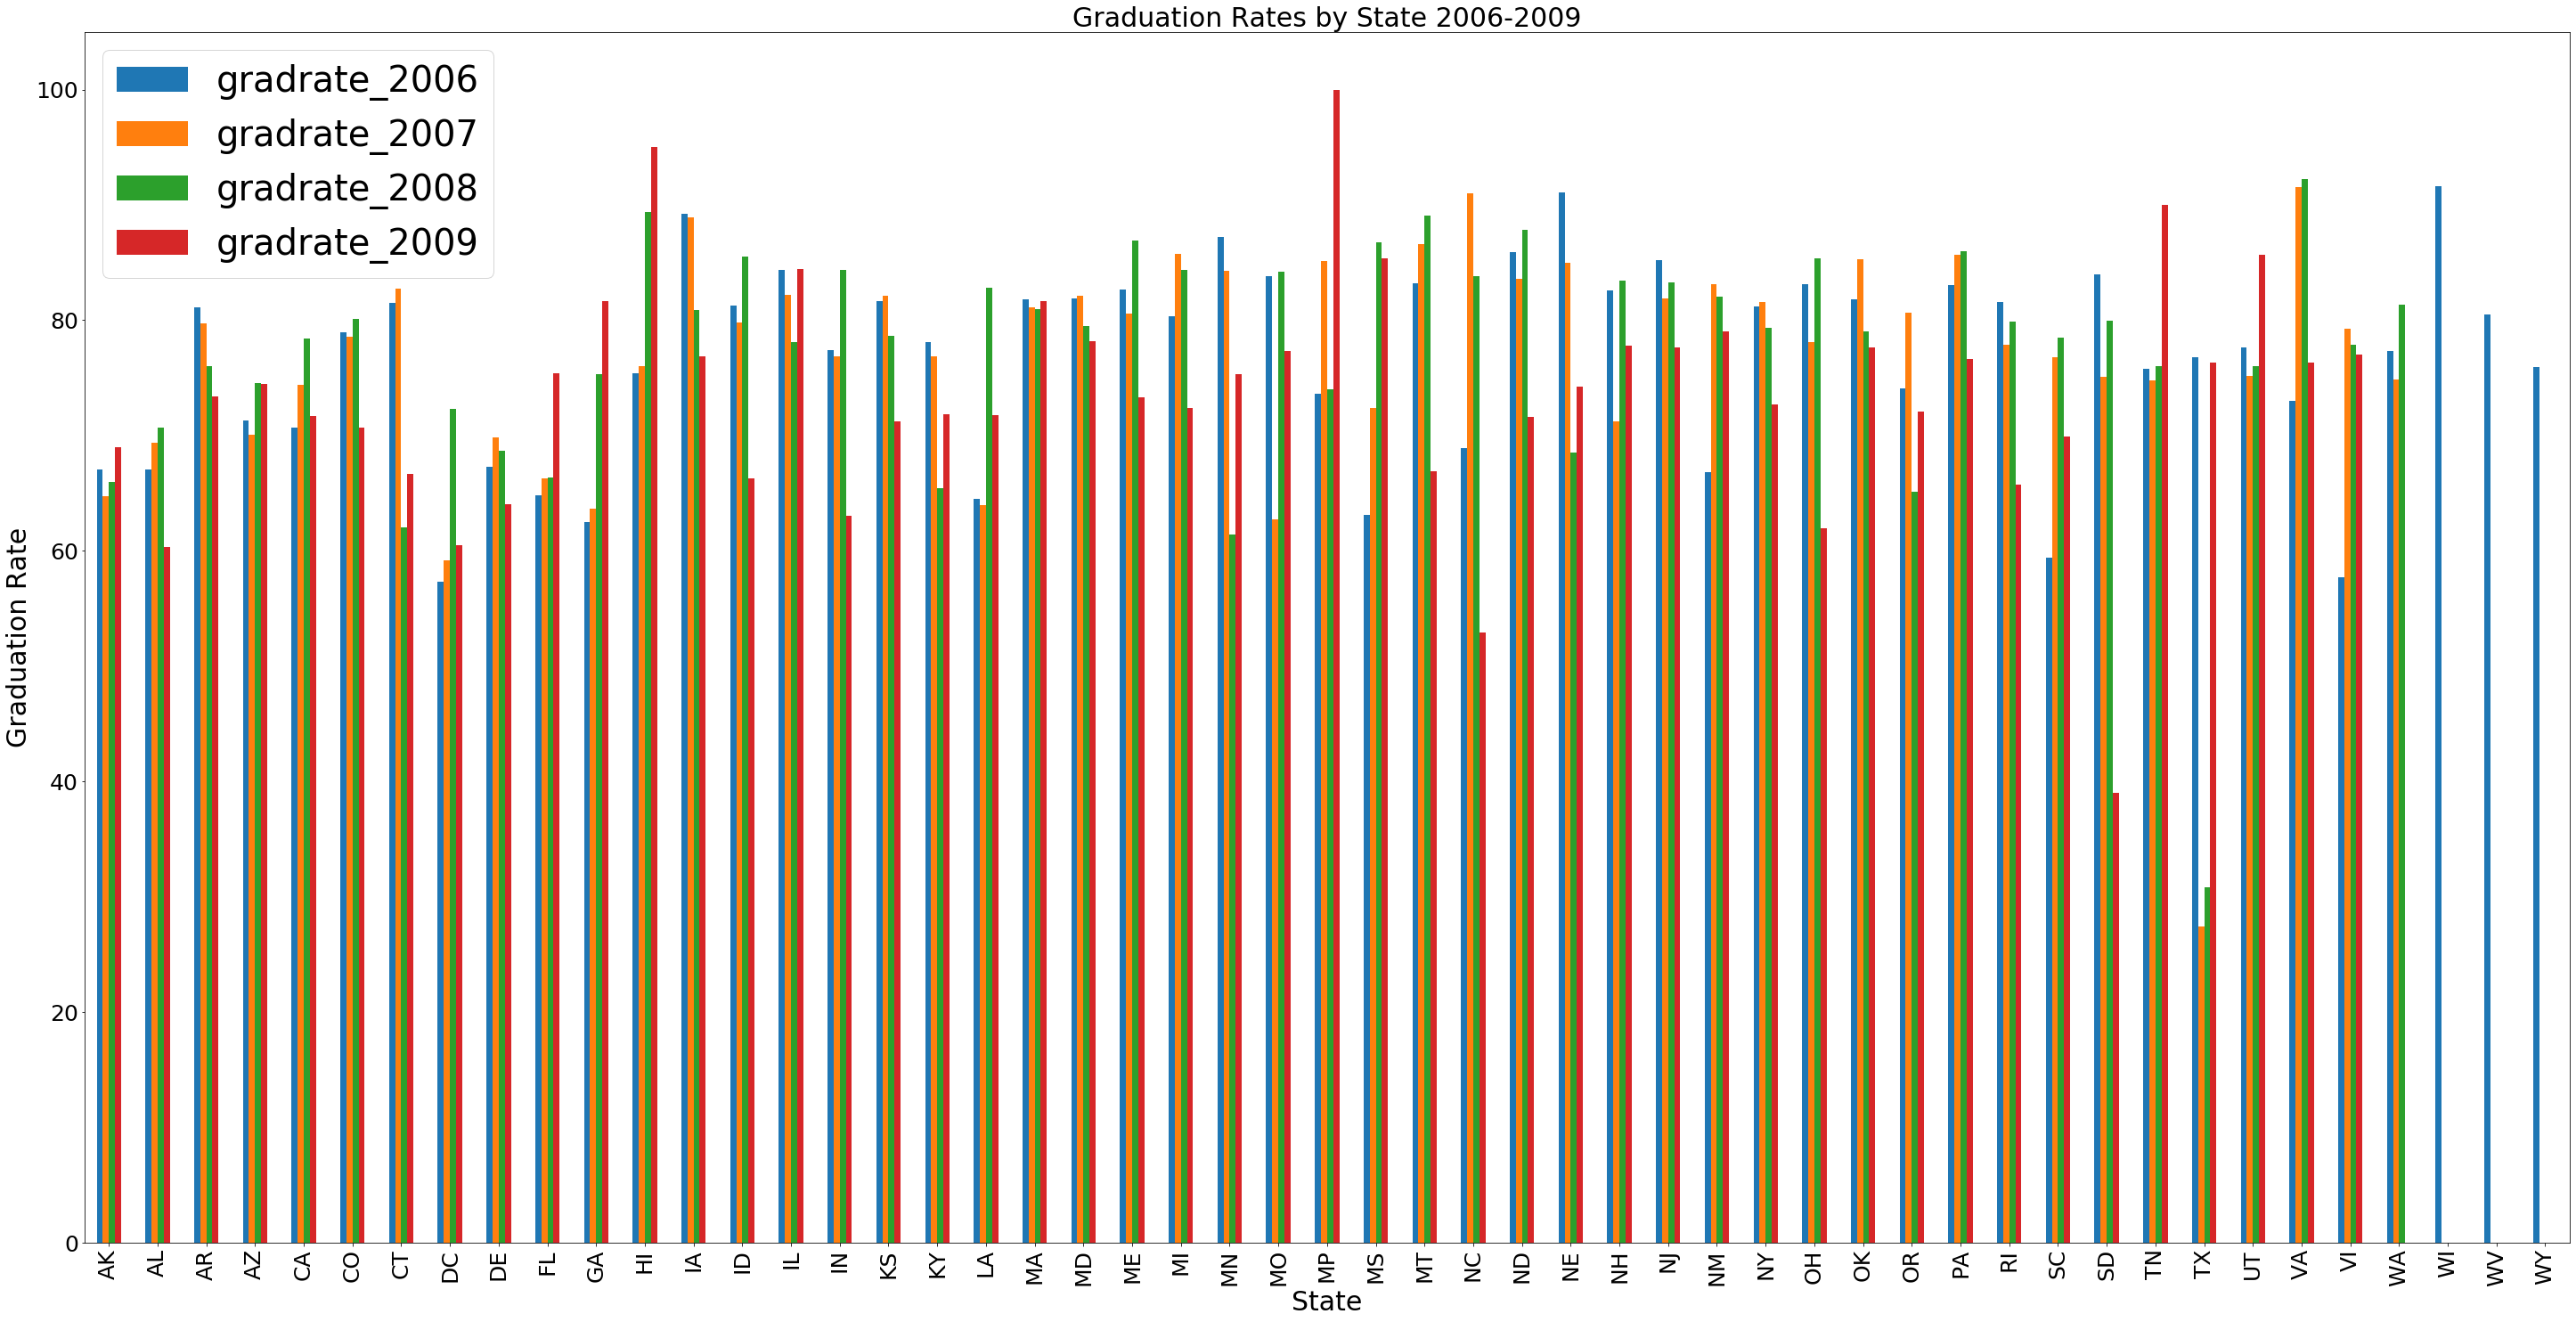

In [28]:
#Graph of Graduation Rates all State
multi_plot_grad = gradrates_allyears.plot(kind="bar", figsize = (50, 25))
multi_plot_grad.set_xticklabels(gradrates_allyears['state'], rotation = 90)

multi_plot_grad.legend(fancybox=True, frameon=True, prop={'size':40})
plt.title('Graduation Rates by State 2006-2009', fontsize=30)
#plt.legend("crimerate_2006")
plt.xlabel('State', fontsize=30)
plt.ylabel('Graduation Rate', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(labelsize=25)

plt.show()